<a href="https://colab.research.google.com/github/jamieatiyah/Hurricane-Deep-Learning-Project/blob/main/Hurricane_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages, and Mounting Google Drive

In [ ]:
#Only required is user does not have torch installed
#!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.optim.lr_scheduler import _LRScheduler
import torch.utils.data as data

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

from sklearn import decomposition
from sklearn import manifold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from collections import Counter
import glob as glob

import copy
from collections import namedtuple
import os
import random
import shutil
import time
import collections
import math
import pandas as pd
import seaborn as sns

In [ ]:
#The files are imported using google drive. The data set is avilable at: https://ieee-dataport.org/open-access/detecting-damaged-buildings-post-hurricane-satellite-imagery-based-customized
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Set a seed to make reproducible results

In [ ]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

# Unpack the Zip file

In [ ]:
shutil.unpack_archive("/content/drive/MyDrive/Labs/datasets/Satellite-Images-of-Hurricane-Damage.zip", "/content/datasets/")

# Plotting Image

In [ ]:
img0 = Image.open("/content/datasets/Satellite-Images-of-Hurricane-Damage/train_another/damage/-93.55964_30.895018.jpeg")
img1 = Image.open("/content/datasets/Satellite-Images-of-Hurricane-Damage/train_another/damage/-93.608532_30.661488000000002.jpeg")
img2 = Image.open("/content/datasets/Satellite-Images-of-Hurricane-Damage/train_another/no_damage/-95.062371_29.829815999999997.jpeg")
img3 = Image.open("/content/datasets/Satellite-Images-of-Hurricane-Damage/train_another/damage/-93.635751_30.036472999999997.jpeg")
img4 = Image.open("/content/datasets/Satellite-Images-of-Hurricane-Damage/train_another/no_damage/-95.06470300000001_29.790514.jpeg")
img5 = Image.open("/content/datasets/Satellite-Images-of-Hurricane-Damage/train_another/no_damage/-95.066581_29.832076.jpeg")
img6 = Image.open("/content/datasets/Satellite-Images-of-Hurricane-Damage/train_another/no_damage/-95.068529_30.037692.jpeg")
img7 = Image.open("/content/datasets/Satellite-Images-of-Hurricane-Damage/train_another/damage/-95.089472_29.876158.jpeg")
img8 = Image.open("/content/datasets/Satellite-Images-of-Hurricane-Damage/train_another/damage/-95.09474499999999_29.8338.jpeg")

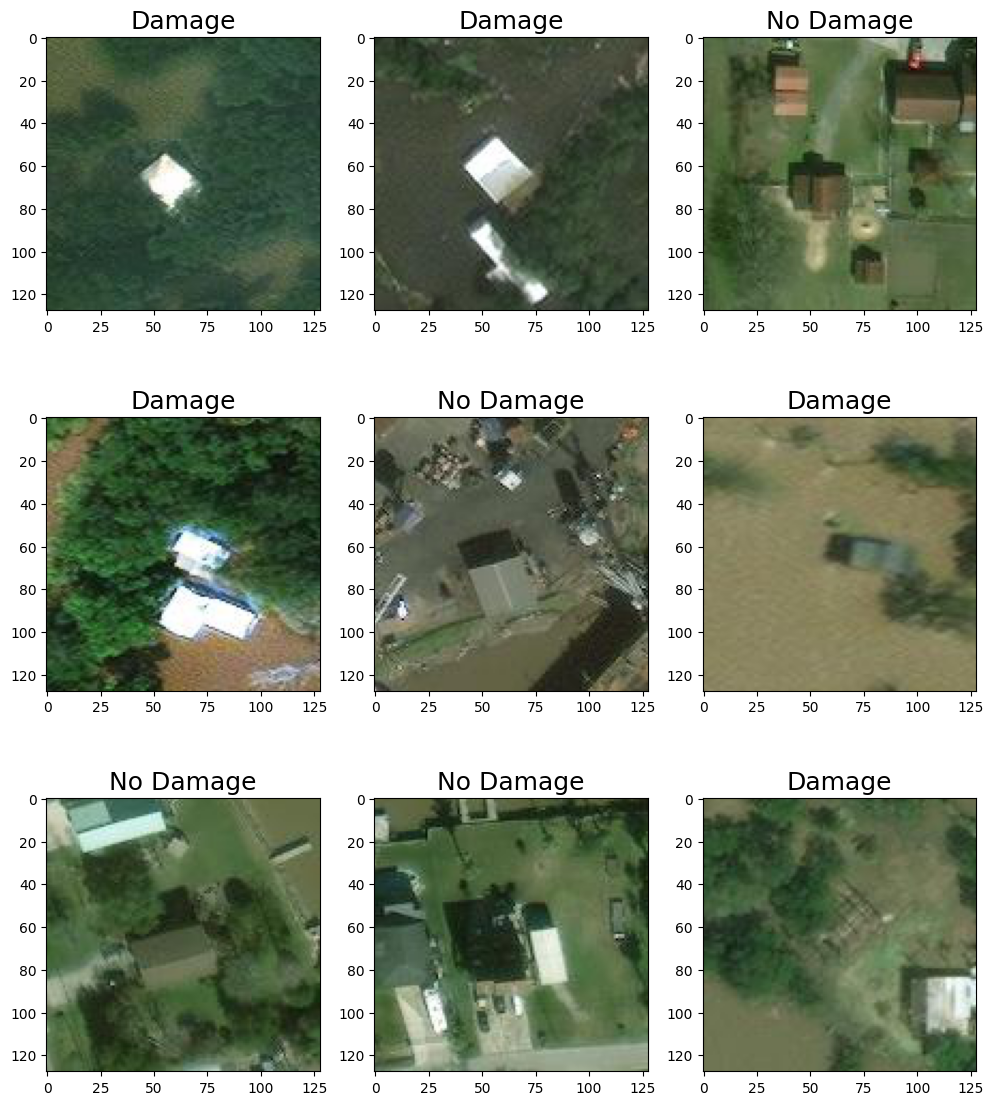

In [ ]:
fig,axs = plt.subplots(nrows = 3, ncols = 3, figsize = (12,14))
plt.sca(axs[0,0])
plt.imshow(img0)
plt.title('Damage', fontsize=18)
plt.sca(axs[1,0])
plt.imshow(img1)
plt.title('Damage', fontsize=18)
plt.sca(axs[2,0])
plt.imshow(img2)
plt.title('No Damage', fontsize=18)
plt.sca(axs[0,1])
plt.imshow(img3)
plt.title('Damage', fontsize=18)
plt.sca(axs[1,1])
plt.imshow(img4)
plt.title('No Damage', fontsize=18)
plt.sca(axs[2,1])
plt.imshow(img5)
plt.title('No Damage', fontsize=18)
plt.sca(axs[0,2])
plt.imshow(img6)
plt.title('No Damage', fontsize=18)
plt.sca(axs[1,2])
plt.imshow(img7)
plt.title('Damage', fontsize=18)
plt.sca(axs[2,2])
plt.imshow(img8)
plt.title('Damage', fontsize=18)


fig.savefig('Hurricane Images.png',  bbox_inches='tight')

In [ ]:
#@title Splitting to RGB channels
red0, green0, blue0 = img0.split()
zeroed_band = red0.point(lambda _: 0)
red0_merge = Image.merge("RGB", (red0, zeroed_band, zeroed_band))
green0_merge = Image.merge("RGB", (zeroed_band, green0, zeroed_band))
blue0_merge = Image.merge("RGB", (zeroed_band, zeroed_band, blue0))
red1, green1, blue1 = img1.split()
zeroed_band = red1.point(lambda _: 0)
red1_merge = Image.merge("RGB", (red1, zeroed_band, zeroed_band))
green1_merge = Image.merge("RGB", (zeroed_band, green1, zeroed_band))
blue1_merge = Image.merge("RGB", (zeroed_band, zeroed_band, blue1))
red2, green2, blue2 = img0.split()
zeroed_band = red2.point(lambda _: 0)
red2_merge = Image.merge("RGB", (red2, zeroed_band, zeroed_band))
green2_merge = Image.merge("RGB", (zeroed_band, green2, zeroed_band))
blue2_merge = Image.merge("RGB", (zeroed_band, zeroed_band, blue2))

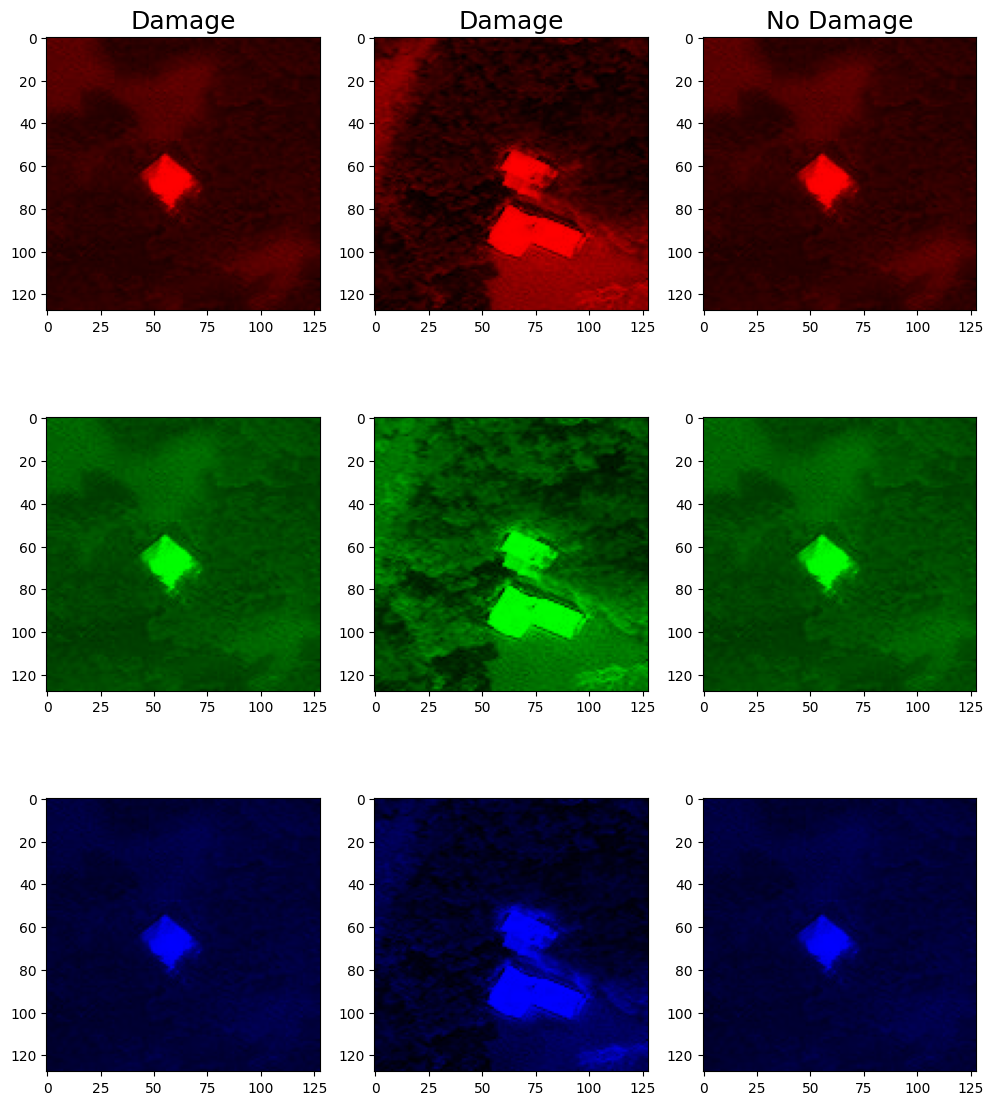

In [ ]:
#@title Plotting the different RGB channels
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (12,14))
plt.sca(axs[0,0])
plt.imshow(red0_merge)
plt.title('Damage',  fontsize=18)
plt.sca(axs[1,0])
plt.imshow(green0_merge)
plt.sca(axs[2,0])
plt.imshow(blue0_merge)
plt.sca(axs[0,1])
plt.imshow(red1_merge)
plt.title('Damage',  fontsize=18)
plt.sca(axs[1,1])
plt.imshow(green1_merge)
plt.sca(axs[2,1])
plt.imshow(blue1_merge)
plt.sca(axs[0,2])
plt.imshow(red2_merge)
plt.title('No Damage',  fontsize=18)
plt.sca(axs[1,2])
plt.imshow(green2_merge)
plt.sca(axs[2,2])
plt.imshow(blue2_merge)
fig.savefig('Hurricane RGB Images.png',  bbox_inches='tight');

# Image Augmentation

In [ ]:
batch_size = 32
transform_train = torchvision.transforms.Compose([
    # Scale the image up to a square of 40 pixels in both height and width
    torchvision.transforms.Resize(40),
    # Randomly crop a square image of 40 pixels in both height and width to
    # produce a small square of 0.64 to 1 times the area of the original
    # image, and then scale it to a square of 32 pixels in both height and
    # width
    torchvision.transforms.RandomResizedCrop(32, scale=(0.64, 1.0),
                                                   ratio=(1.0, 1.0)),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    # Standardize each channel of the image
    torchvision.transforms.Normalize([0.4914, 0.4822, 0.4465],
                                     [0.2023, 0.1994, 0.2010])])

transform_test = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.4914, 0.4822, 0.4465],
                                     [0.2023, 0.1994, 0.2010])])

# Organising the Dataset

In [ ]:
Training_data_dir = '/content/datasets/Satellite-Images-of-Hurricane-Damage/train_another/'
Test_data_dir     = '/content/datasets/Satellite-Images-of-Hurricane-Damage/test_another'
Valid_data_dir = '/content/datasets/Satellite-Images-of-Hurricane-Damage/validation_another'
data_dir          = '/content/datasets/'

In [ ]:
print(os.listdir(Training_data_dir))
print(os.listdir(Test_data_dir))

['damage', 'no_damage']
['damage', 'no_damage']


In [ ]:
#Read in the train, train_valid, valid and test data sets using ImageFolder

data_dir          = '/content/datasets/'
train_ds, train_valid_ds = [torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'Satellite-Images-of-Hurricane-Damage', folder),
    transform=transform_train) for folder in ['train_another', 'validation_another']]

valid_ds, test_ds = [torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'Satellite-Images-of-Hurricane-Damage', folder),
    transform=transform_test) for folder in ['test_another', 'test']]

In [ ]:
train_iter, train_valid_iter = [torch.utils.data.DataLoader(
    dataset, batch_size, shuffle=True, drop_last=True)
    for dataset in (train_ds, train_valid_ds)]

valid_iter = torch.utils.data.DataLoader(valid_ds, batch_size, shuffle=False,
                                         drop_last=True)

test_iter = torch.utils.data.DataLoader(test_ds, batch_size, shuffle=False,
                                        drop_last=False)

In [ ]:
print(f'The length of the training data set is : {len(train_ds)}')
print(f'The length of the validation data set is : {len(train_valid_ds)}')
print(f'The length of the test data set is : {len(test_ds)}')

The length of the training data set is : 10000
The length of the validation data set is : 2000
The length of the test data set is : 2000


In [ ]:
directory = "/content/datasets/Satellite-Images-of-Hurricane-Damage"

# Get all subdirectories in the directory
subdirectories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

# Define the labels (folder names within each subdirectory)
labels = ["damage", "no damage"]

#Get the labels in each data set

train_labels = [label for _, label in train_ds]
test_labels = [label for _, label in test_ds]
train_valid_labels = [label for _, label in train_valid_ds]

#Count the occurences of each label

train_label_counts = Counter(train_labels)
test_label_counts = Counter(test_labels)
train_valid_label_counts = Counter(train_valid_labels)

#Create dictionary with keys as the labels (damage, no damage) and values as the count

train_label_counts_dict = {label: train_label_counts[label_idx] for label_idx, label in enumerate(labels)}
test_label_counts_dict = {label: test_label_counts[label_idx] for label_idx, label in enumerate(labels)}
train_valid_label_counts_dict = {label: train_valid_label_counts[label_idx] for label_idx, label in enumerate(labels)}

#Print the number of each label in the train, test and valid data set
print(train_label_counts_dict)
print(test_label_counts_dict)
print(train_valid_label_counts_dict)

{'damage': 5000, 'no damage': 5000}
{'damage': 1000, 'no damage': 1000}
{'damage': 1000, 'no damage': 1000}


In [ ]:
print(train_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

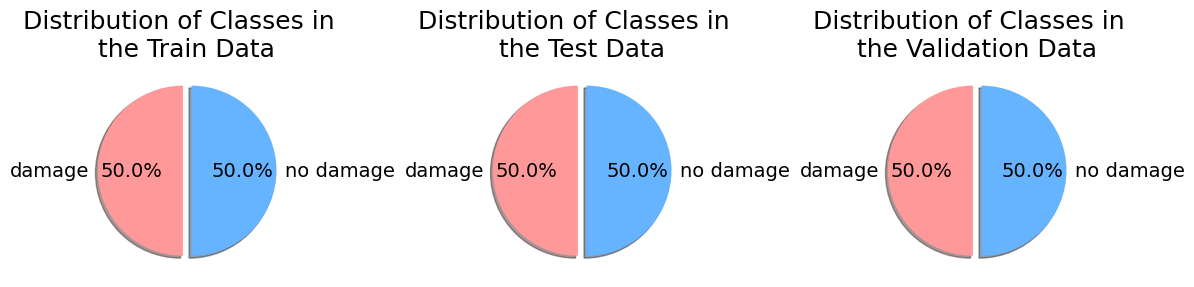

In [ ]:
colors = ['#ff9999', '#66b3ff']
explode = (0, 0.1)
fig, ax = plt.subplots(1, 3, figsize=(12, 14))

ax[0].pie(train_label_counts_dict.values(), labels=train_label_counts_dict.keys(), explode=explode, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
ax[0].set_title("Distribution of Classes in \n the Train Data", fontsize=18)
ax[1].pie(test_label_counts_dict.values(), labels=test_label_counts_dict.keys(), explode=explode, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
ax[1].set_title("Distribution of Classes in \n the Test Data", fontsize=18)
ax[2].pie(train_valid_label_counts_dict.values(), labels=train_valid_label_counts_dict.keys(), explode=explode, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
ax[2].set_title("Distribution of Classes in \n the Validation Data", fontsize=18)
fig.tight_layout()
fig.savefig('Class_distributions.png', bbox_inches='tight')

In [ ]:
means = torch.zeros(3)
stds = torch.zeros(3)

for img, label in train_ds:
    means += torch.mean(img, dim = (1,2))
    stds += torch.std(img, dim = (1,2))

means /= len(train_ds)
stds /= len(train_ds)

print(f'Calculated means: {means}')
print(f'Calculated stds: {stds}')

Calculated means: tensor([-0.6711, -0.4692, -0.7767])
Calculated stds: tensor([0.5176, 0.4513, 0.4562])


In [ ]:
#normalise image function
def normalize_image(image):
    image_min = image.min()
    image_max = image.max()
    image.clamp_(min = image_min, max = image_max)
    image.add_(-image_min).div_(image_max - image_min + 1e-5)
    return image



def plot_images(images, labels, classes, normalize = True):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize = (15, 15))

    for i in range(rows*cols):

        ax = fig.add_subplot(rows, cols, i+1)

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax.imshow(image.permute(1, 2, 0).cpu().numpy())
        label = classes[labels[i]]
        ax.set_title(label)
        ax.axis('off')

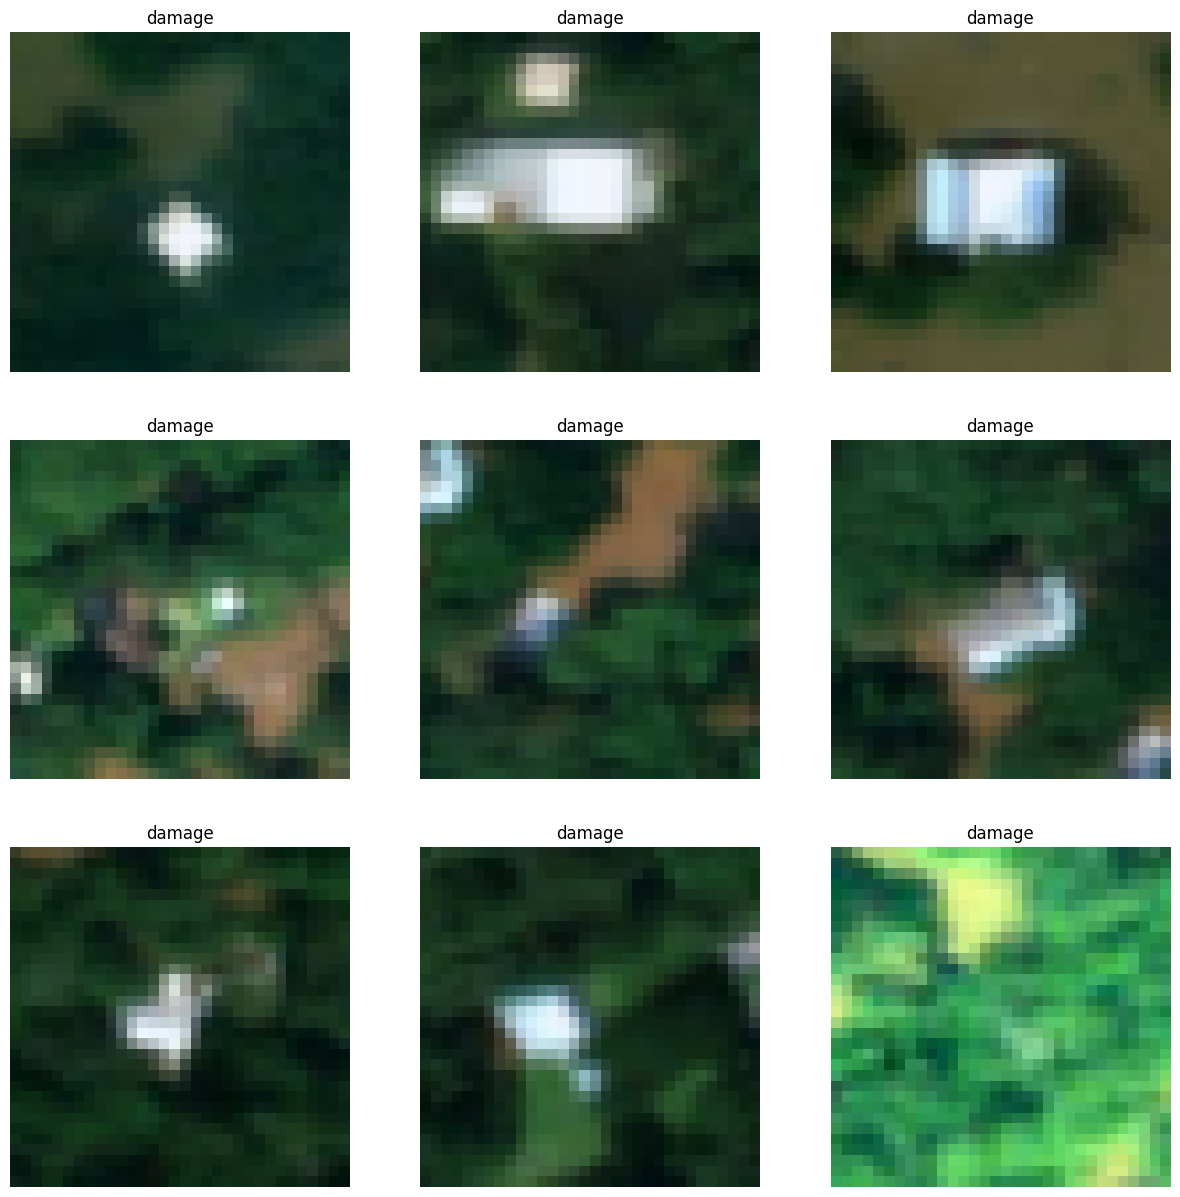

In [ ]:
N_IMAGES = 10

images, labels = zip(*[(image, label) for image, label in
                           [train_ds[i] for i in range(N_IMAGES)]])

classes = train_ds.classes

plot_images(images, labels, classes)

# Model Building - VGG - 16



Functions to used to establish hypterparameters

In [ ]:
#@title Count Parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
#@title Accuracy Calculation
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [ ]:
#@title Model Train and Evaluation
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
#@title Epoch Time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
#@title Model Predictions
def get_predictions(model, iterator, device):

    model.eval()

    images = []
    labels = []
    probs = []
    ground_truth = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())
            ground_truth.append(F.one_hot(y, num_classes = 2))

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)
    ground_truth = torch.cat(ground_truth, dim = 0)

    return images, labels, probs, ground_truth




In [ ]:
#@title VGG Model
class VGG(nn.Module):
    def __init__(self, features, output_dim):
        super().__init__()

        self.features = features

        self.avgpool = nn.AdaptiveAvgPool2d(7)

        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, output_dim),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.classifier(h)
        return x, h

vgg11_config = [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M']

vgg13_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512,
                512, 'M']

vgg16_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512,
                'M', 512, 512, 512, 'M']

vgg19_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512,
                512, 512, 'M', 512, 512, 512, 512, 'M']

def get_vgg_layers(config, batch_norm):

    layers = []
    in_channels = 3

    for c in config:
        assert c == 'M' or isinstance(c, int)
        if c == 'M':
            layers += [nn.MaxPool2d(kernel_size=2)]
        else:
            conv2d = nn.Conv2d(in_channels, c, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(c), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = c

    return nn.Sequential(*layers)

In [ ]:
#@title VGG-19
vgg19_layers = get_vgg_layers(vgg19_config, batch_norm=True)
#print(vgg11_layers)

OUTPUT_DIM = 2

VGG_model_19 = VGG(vgg19_layers, OUTPUT_DIM)
#print(model)
pretrained_VGG_model_19 = models.vgg19_bn(pretrained=True)
#print(pretrained_model)
IN_FEATURES = pretrained_VGG_model_19.classifier[-1].in_features

final_fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:01<00:00, 296MB/s]


In [ ]:
#@title VGG-16
vgg16_layers = get_vgg_layers(vgg16_config, batch_norm=True)

OUTPUT_DIM = 2

VGG_model = VGG(vgg16_layers, OUTPUT_DIM)
#print(model)
pretrained_VGG_model = models.vgg16_bn(pretrained=True)
#print(pretrained_model)
IN_FEATURES = pretrained_VGG_model.classifier[-1].in_features

final_fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:10<00:00, 52.9MB/s]


In [ ]:
print(f'The VGG-16 model has {count_parameters(VGG_model):,} trainable parameters')

The VGG-16 model has 134,277,186 trainable parameters


In [ ]:
print(f'The VGG-19 model has {count_parameters(VGG_model_19):,} trainable parameters')

The VGG-19 model has 139,589,442 trainable parameters


## VGG

The first model built is VGG. The below block is required to build the model.

The hypterparameters learning rate and early stopping can be fine tuned in the pursuit of optimal performance.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()

VGG_model = VGG_model.to(device)
criterion = criterion.to(device)

EPOCHS = 5

Learning_rates = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
Opts = [optim.RMSprop, optim.Adam, optim.SGD]

#Create lists to store the accuracy, loss, epochs, learning rate and the optimiser

train_accs   = []
valid_accs   = []
train_losses = []
valid_losses  = []
epochs = []
lrs = []
opt = []

best_valid_loss = float('inf')
best_VGG_model = None

#Iterate through each instance of epoch, learning rate and optimiser
for epoch in trange(EPOCHS, desc="Epochs"):
    for lear in Learning_rates:
      for optim in Opts:


        start_time = time.monotonic()

        params = [

            {'params':VGG_model.features.parameters(),'lr': lear/10},
            {'params':VGG_model.classifier.parameters()}
        ]

        optimizer = optim(params, lr = lear)

        #Obtain train and valid loss and accuracy

        train_loss, train_acc = train(VGG_model, train_iter, optimizer, criterion, device)
        valid_loss, valid_acc = evaluate(VGG_model, valid_iter, criterion, device)

        #The best model has the lowest loss on validation set

        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(VGG_model.state_dict(), 'best-model.pt')
            best_VGG_model = VGG_model.state_dict()

        end_time = time.monotonic()

        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

        #Append accuracy, loss, learning rate, optimiser, and epoch to relevant list

        train_accs.append(train_acc)
        valid_accs.append(valid_acc)
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        lrs.append(lear)
        opt.append(optim)
        epochs.append(epoch)


        print(f'Optimiser: {optim} | Learning Rate: {lear} | Epoch: {epoch}')
        print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
        print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
        print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

#Saving the best VGG model configuration

torch.save(best_VGG_model, 'best_VGG_model.pt')

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 1e-07 | Epoch: 0
Epoch: 01 | Epoch Time: 0m 54s
	Train Loss: 0.684 | Train Acc: 56.34%
	 Val. Loss: 0.880 |  Val. Acc: 14.16%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 1e-07 | Epoch: 0
Epoch: 01 | Epoch Time: 0m 37s
	Train Loss: 0.668 | Train Acc: 61.39%
	 Val. Loss: 1.002 |  Val. Acc: 11.79%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 1e-07 | Epoch: 0
Epoch: 01 | Epoch Time: 0m 32s
	Train Loss: 0.661 | Train Acc: 63.19%
	 Val. Loss: 0.996 |  Val. Acc: 11.69%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 1e-06 | Epoch: 0
Epoch: 01 | Epoch Time: 0m 38s
	Train Loss: 0.613 | Train Acc: 67.94%
	 Val. Loss: 0.395 |  Val. Acc: 88.97%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 1e-06 | Epoch: 0
Epoch: 01 | Epoch Time: 0m 36s
	Train Loss: 0.553 | Train Acc: 72.23%
	 Val. Loss: 0.428 |  Val. Acc: 88.97%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 1e-06 | Epoch: 0
Epoch: 01 | Epoch Time: 0m 33s
	Train Loss: 0.533 | Train Acc: 73.62%
	 Val. Loss: 0.434 |  Val. Acc: 88.97%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 1e-05 | Epoch: 0
Epoch: 01 | Epoch Time: 0m 36s
	Train Loss: 0.573 | Train Acc: 74.79%
	 Val. Loss: 0.586 |  Val. Acc: 88.97%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 1e-05 | Epoch: 0
Epoch: 01 | Epoch Time: 0m 37s
	Train Loss: 0.406 | Train Acc: 82.29%
	 Val. Loss: 0.397 |  Val. Acc: 88.97%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 1e-05 | Epoch: 0
Epoch: 01 | Epoch Time: 0m 33s
	Train Loss: 0.374 | Train Acc: 83.11%
	 Val. Loss: 0.432 |  Val. Acc: 88.97%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 0.0001 | Epoch: 0
Epoch: 01 | Epoch Time: 0m 36s
	Train Loss: 1.312 | Train Acc: 80.91%
	 Val. Loss: 0.608 |  Val. Acc: 88.97%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 0.0001 | Epoch: 0
Epoch: 01 | Epoch Time: 0m 38s
	Train Loss: 0.293 | Train Acc: 88.04%
	 Val. Loss: 0.413 |  Val. Acc: 89.06%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 0.0001 | Epoch: 0
Epoch: 01 | Epoch Time: 0m 37s
	Train Loss: 0.235 | Train Acc: 90.37%
	 Val. Loss: 0.200 |  Val. Acc: 90.73%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 0.001 | Epoch: 0
Epoch: 01 | Epoch Time: 0m 37s
	Train Loss: 9.590 | Train Acc: 50.96%
	 Val. Loss: 103.743 |  Val. Acc: 11.03%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 0.001 | Epoch: 0
Epoch: 01 | Epoch Time: 0m 37s
	Train Loss: 0.707 | Train Acc: 52.65%
	 Val. Loss: 135.398 |  Val. Acc: 12.01%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 0.001 | Epoch: 0
Epoch: 01 | Epoch Time: 0m 34s
	Train Loss: 0.693 | Train Acc: 50.57%
	 Val. Loss: 120.886 |  Val. Acc: 12.00%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 1e-07 | Epoch: 1
Epoch: 02 | Epoch Time: 0m 35s
	Train Loss: 0.693 | Train Acc: 49.94%
	 Val. Loss: 115.635 |  Val. Acc: 12.10%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 1e-07 | Epoch: 1
Epoch: 02 | Epoch Time: 0m 37s
	Train Loss: 0.694 | Train Acc: 49.52%
	 Val. Loss: 103.902 |  Val. Acc: 12.13%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 1e-07 | Epoch: 1
Epoch: 02 | Epoch Time: 0m 33s
	Train Loss: 0.693 | Train Acc: 50.21%
	 Val. Loss: 126.645 |  Val. Acc: 12.11%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 1e-06 | Epoch: 1
Epoch: 02 | Epoch Time: 0m 36s
	Train Loss: 0.693 | Train Acc: 49.83%
	 Val. Loss: 111.921 |  Val. Acc: 12.19%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 1e-06 | Epoch: 1
Epoch: 02 | Epoch Time: 0m 37s
	Train Loss: 0.693 | Train Acc: 50.08%
	 Val. Loss: 118.734 |  Val. Acc: 12.20%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 1e-06 | Epoch: 1
Epoch: 02 | Epoch Time: 0m 33s
	Train Loss: 0.693 | Train Acc: 49.73%
	 Val. Loss: 110.757 |  Val. Acc: 11.96%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 1e-05 | Epoch: 1
Epoch: 02 | Epoch Time: 0m 36s
	Train Loss: 0.693 | Train Acc: 50.22%
	 Val. Loss: 108.880 |  Val. Acc: 12.31%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 1e-05 | Epoch: 1
Epoch: 02 | Epoch Time: 0m 37s
	Train Loss: 0.693 | Train Acc: 49.88%
	 Val. Loss: 107.025 |  Val. Acc: 12.21%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 1e-05 | Epoch: 1
Epoch: 02 | Epoch Time: 0m 34s
	Train Loss: 0.693 | Train Acc: 49.61%
	 Val. Loss: 106.955 |  Val. Acc: 12.24%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 0.0001 | Epoch: 1
Epoch: 02 | Epoch Time: 0m 37s
	Train Loss: 0.693 | Train Acc: 50.83%
	 Val. Loss: 92.388 |  Val. Acc: 12.42%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 0.0001 | Epoch: 1
Epoch: 02 | Epoch Time: 0m 38s
	Train Loss: 0.693 | Train Acc: 49.65%
	 Val. Loss: 127.116 |  Val. Acc: 12.43%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 0.0001 | Epoch: 1
Epoch: 02 | Epoch Time: 0m 33s
	Train Loss: 0.693 | Train Acc: 50.26%
	 Val. Loss: 131.402 |  Val. Acc: 12.29%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 0.001 | Epoch: 1
Epoch: 02 | Epoch Time: 0m 36s
	Train Loss: 0.694 | Train Acc: 50.24%
	 Val. Loss: 147.809 |  Val. Acc: 13.53%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 0.001 | Epoch: 1
Epoch: 02 | Epoch Time: 0m 38s
	Train Loss: 0.694 | Train Acc: 49.26%
	 Val. Loss: 152.034 |  Val. Acc: 14.00%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 0.001 | Epoch: 1
Epoch: 02 | Epoch Time: 0m 34s
	Train Loss: 0.693 | Train Acc: 50.62%
	 Val. Loss: 148.318 |  Val. Acc: 13.57%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 1e-07 | Epoch: 2
Epoch: 03 | Epoch Time: 0m 35s
	Train Loss: 0.693 | Train Acc: 50.65%
	 Val. Loss: 126.618 |  Val. Acc: 13.83%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 1e-07 | Epoch: 2
Epoch: 03 | Epoch Time: 0m 37s
	Train Loss: 0.693 | Train Acc: 49.47%
	 Val. Loss: 137.568 |  Val. Acc: 14.22%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 1e-07 | Epoch: 2
Epoch: 03 | Epoch Time: 0m 33s
	Train Loss: 0.693 | Train Acc: 50.48%
	 Val. Loss: 173.712 |  Val. Acc: 13.51%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 1e-06 | Epoch: 2
Epoch: 03 | Epoch Time: 0m 36s
	Train Loss: 0.693 | Train Acc: 50.47%
	 Val. Loss: 138.927 |  Val. Acc: 13.48%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 1e-06 | Epoch: 2
Epoch: 03 | Epoch Time: 0m 37s
	Train Loss: 0.693 | Train Acc: 49.74%
	 Val. Loss: 154.392 |  Val. Acc: 13.62%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 1e-06 | Epoch: 2
Epoch: 03 | Epoch Time: 0m 33s
	Train Loss: 0.693 | Train Acc: 50.78%
	 Val. Loss: 143.690 |  Val. Acc: 13.80%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 1e-05 | Epoch: 2
Epoch: 03 | Epoch Time: 0m 35s
	Train Loss: 0.694 | Train Acc: 49.91%
	 Val. Loss: 153.629 |  Val. Acc: 13.67%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 1e-05 | Epoch: 2
Epoch: 03 | Epoch Time: 0m 37s
	Train Loss: 0.694 | Train Acc: 49.74%
	 Val. Loss: 158.752 |  Val. Acc: 14.22%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 1e-05 | Epoch: 2
Epoch: 03 | Epoch Time: 0m 33s
	Train Loss: 0.693 | Train Acc: 49.57%
	 Val. Loss: 160.534 |  Val. Acc: 13.86%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 0.0001 | Epoch: 2
Epoch: 03 | Epoch Time: 0m 36s
	Train Loss: 0.694 | Train Acc: 49.48%
	 Val. Loss: 147.031 |  Val. Acc: 14.54%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 0.0001 | Epoch: 2
Epoch: 03 | Epoch Time: 0m 37s
	Train Loss: 0.694 | Train Acc: 49.16%
	 Val. Loss: 143.998 |  Val. Acc: 14.79%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 0.0001 | Epoch: 2
Epoch: 03 | Epoch Time: 0m 33s
	Train Loss: 0.694 | Train Acc: 50.26%
	 Val. Loss: 161.083 |  Val. Acc: 13.76%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 0.001 | Epoch: 2
Epoch: 03 | Epoch Time: 0m 35s
	Train Loss: 0.694 | Train Acc: 50.05%
	 Val. Loss: 106.031 |  Val. Acc: 14.05%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 0.001 | Epoch: 2
Epoch: 03 | Epoch Time: 0m 37s
	Train Loss: 0.694 | Train Acc: 49.83%
	 Val. Loss: 127.750 |  Val. Acc: 12.37%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 0.001 | Epoch: 2
Epoch: 03 | Epoch Time: 0m 34s
	Train Loss: 0.694 | Train Acc: 50.18%
	 Val. Loss: 128.671 |  Val. Acc: 12.43%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 1e-07 | Epoch: 3
Epoch: 04 | Epoch Time: 0m 35s
	Train Loss: 0.693 | Train Acc: 50.31%
	 Val. Loss: 135.746 |  Val. Acc: 12.51%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 1e-07 | Epoch: 3
Epoch: 04 | Epoch Time: 0m 38s
	Train Loss: 0.693 | Train Acc: 50.60%
	 Val. Loss: 126.946 |  Val. Acc: 12.33%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 1e-07 | Epoch: 3
Epoch: 04 | Epoch Time: 0m 34s
	Train Loss: 0.694 | Train Acc: 49.24%
	 Val. Loss: 128.539 |  Val. Acc: 12.20%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 1e-06 | Epoch: 3
Epoch: 04 | Epoch Time: 0m 37s
	Train Loss: 0.694 | Train Acc: 48.95%
	 Val. Loss: 117.136 |  Val. Acc: 12.33%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 1e-06 | Epoch: 3
Epoch: 04 | Epoch Time: 0m 37s
	Train Loss: 0.694 | Train Acc: 49.11%
	 Val. Loss: 120.426 |  Val. Acc: 12.36%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 1e-06 | Epoch: 3
Epoch: 04 | Epoch Time: 0m 34s
	Train Loss: 0.693 | Train Acc: 49.62%
	 Val. Loss: 120.621 |  Val. Acc: 12.36%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 1e-05 | Epoch: 3
Epoch: 04 | Epoch Time: 0m 36s
	Train Loss: 0.694 | Train Acc: 49.97%
	 Val. Loss: 132.160 |  Val. Acc: 12.52%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 1e-05 | Epoch: 3
Epoch: 04 | Epoch Time: 0m 38s
	Train Loss: 0.694 | Train Acc: 49.88%
	 Val. Loss: 98.586 |  Val. Acc: 12.73%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 1e-05 | Epoch: 3
Epoch: 04 | Epoch Time: 0m 34s
	Train Loss: 0.693 | Train Acc: 49.92%
	 Val. Loss: 126.372 |  Val. Acc: 12.40%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 0.0001 | Epoch: 3
Epoch: 04 | Epoch Time: 0m 37s
	Train Loss: 0.694 | Train Acc: 49.75%
	 Val. Loss: 114.687 |  Val. Acc: 13.56%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 0.0001 | Epoch: 3
Epoch: 04 | Epoch Time: 0m 38s
	Train Loss: 0.693 | Train Acc: 51.16%
	 Val. Loss: 115.050 |  Val. Acc: 13.97%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 0.0001 | Epoch: 3
Epoch: 04 | Epoch Time: 0m 33s
	Train Loss: 0.693 | Train Acc: 50.00%
	 Val. Loss: 98.185 |  Val. Acc: 14.21%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 0.001 | Epoch: 3
Epoch: 04 | Epoch Time: 0m 37s
	Train Loss: 0.694 | Train Acc: 49.90%
	 Val. Loss: 156.114 |  Val. Acc: 11.89%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 0.001 | Epoch: 3
Epoch: 04 | Epoch Time: 0m 37s
	Train Loss: 0.694 | Train Acc: 49.31%
	 Val. Loss: 110.862 |  Val. Acc: 12.37%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 0.001 | Epoch: 3
Epoch: 04 | Epoch Time: 0m 35s
	Train Loss: 0.693 | Train Acc: 50.32%
	 Val. Loss: 104.850 |  Val. Acc: 12.48%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 1e-07 | Epoch: 4
Epoch: 05 | Epoch Time: 0m 36s
	Train Loss: 0.693 | Train Acc: 50.22%
	 Val. Loss: 145.593 |  Val. Acc: 12.28%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 1e-07 | Epoch: 4
Epoch: 05 | Epoch Time: 0m 38s
	Train Loss: 0.694 | Train Acc: 50.20%
	 Val. Loss: 93.200 |  Val. Acc: 12.52%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 1e-07 | Epoch: 4
Epoch: 05 | Epoch Time: 0m 34s
	Train Loss: 0.694 | Train Acc: 49.75%
	 Val. Loss: 97.035 |  Val. Acc: 12.62%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 1e-06 | Epoch: 4
Epoch: 05 | Epoch Time: 0m 37s
	Train Loss: 0.694 | Train Acc: 49.70%
	 Val. Loss: 102.040 |  Val. Acc: 12.51%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 1e-06 | Epoch: 4
Epoch: 05 | Epoch Time: 0m 37s
	Train Loss: 0.694 | Train Acc: 49.76%
	 Val. Loss: 118.588 |  Val. Acc: 12.23%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 1e-06 | Epoch: 4
Epoch: 05 | Epoch Time: 0m 35s
	Train Loss: 0.694 | Train Acc: 50.04%
	 Val. Loss: 118.839 |  Val. Acc: 12.33%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 1e-05 | Epoch: 4
Epoch: 05 | Epoch Time: 0m 37s
	Train Loss: 0.693 | Train Acc: 50.01%
	 Val. Loss: 93.704 |  Val. Acc: 12.72%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 1e-05 | Epoch: 4
Epoch: 05 | Epoch Time: 0m 37s
	Train Loss: 0.693 | Train Acc: 50.59%
	 Val. Loss: 106.719 |  Val. Acc: 12.73%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 1e-05 | Epoch: 4
Epoch: 05 | Epoch Time: 0m 33s
	Train Loss: 0.694 | Train Acc: 50.06%
	 Val. Loss: 129.217 |  Val. Acc: 12.23%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 0.0001 | Epoch: 4
Epoch: 05 | Epoch Time: 0m 37s
	Train Loss: 0.694 | Train Acc: 49.48%
	 Val. Loss: 22.684 |  Val. Acc: 12.24%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 0.0001 | Epoch: 4
Epoch: 05 | Epoch Time: 0m 39s
	Train Loss: 0.693 | Train Acc: 49.98%
	 Val. Loss: 25.723 |  Val. Acc: 12.16%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 0.0001 | Epoch: 4
Epoch: 05 | Epoch Time: 0m 34s
	Train Loss: 0.693 | Train Acc: 49.98%
	 Val. Loss: 24.270 |  Val. Acc: 12.18%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 0.001 | Epoch: 4
Epoch: 05 | Epoch Time: 0m 37s
	Train Loss: 1.231 | Train Acc: 50.30%
	 Val. Loss: 6.273 |  Val. Acc: 88.97%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 0.001 | Epoch: 4
Epoch: 05 | Epoch Time: 0m 37s
	Train Loss: 0.694 | Train Acc: 49.84%
	 Val. Loss: 9.525 |  Val. Acc: 88.97%


Training:   0%|          | 0/312 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/281 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 0.001 | Epoch: 4
Epoch: 05 | Epoch Time: 0m 35s
	Train Loss: 0.694 | Train Acc: 50.06%
	 Val. Loss: 9.840 |  Val. Acc: 88.97%


In [ ]:
print(len(train_accs))
print(len(valid_accs))
print(len(train_losses))
print(len(valid_losses))
print(len(epochs))
print(len(lrs))
print(len(opt))

75
75
75
75
75
75
75


In [ ]:
#Create DF from the lists
accs_losses = pd.DataFrame(

    {'Optimiser':opt,
     'Learning Rate': lrs,
     'Epochs': epochs,
     'train_accuracy': train_accs,
     'valid_accuracy': valid_accs,
     'train_loss': train_losses,
     'valid_loss': valid_losses}
)

In [ ]:
#Filter to smallest loss on valid data set
accs_losses.loc[accs_losses['valid_loss'].idxmin()]

Optimiser         <class 'torch.optim.sgd.SGD'>
Learning Rate                            0.0001
Epochs                                        1
train_accuracy                         0.903746
valid_accuracy                         0.907251
train_loss                             0.234904
valid_loss                             0.200422
Name: 11, dtype: object

The best values for the learning rate and optimiser hyper-parameters are found by finding the smallest loss on the validation data set.

*   Learning rate of 0.0001
*   Optimiser of SGD



In [ ]:
#@title Creating Python Script
%%writefile utils.py
import torch

class LRScheduler():
    """
    Learning rate scheduler. If the validation loss does not decrease for the
    given number of `patience` epochs, then the learning rate will decrease by
    by given `factor`.
    """
    def __init__(
        self, optimizer, patience=5, min_lr=1e-6, factor=0.5
    ):
        """
        new_lr = old_lr * factor

        :param optimizer: the optimizer we are using
        :param patience: how many epochs to wait before updating the lr
        :param min_lr: least lr value to reduce to while updating
        :param factor: factor by which the lr should be updated
        """
        self.optimizer = optimizer
        self.patience = patience
        self.min_lr = min_lr
        self.factor = factor

        self.lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
                self.optimizer,
                mode='min',
                patience=self.patience,
                factor=self.factor,
                min_lr=self.min_lr,
                verbose=True
            )

    def __call__(self, val_loss):
        self.lr_scheduler.step(val_loss)

class EarlyStopping():
    """
    Early stopping to stop the training when the loss does not improve after
    certain epochs.
    """
    def __init__(self, patience=5, min_delta=0):
        """
        :param patience: how many epochs to wait before stopping when loss is
               not improving
        :param min_delta: minimum difference between new loss and old loss for
               new loss to be considered as an improvement
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            # reset counter if validation loss improves
            self.counter = 0
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping')
                self.early_stop = True

Writing utils.py


In [ ]:
#@title Data Set Script
%%writefile dataset.py
import torch.nn as nn
import torch
import torchvision.models as models
from torchvision import transforms, datasets

data_dir          = '/content/datasets/'

# define the image transforms and augmentations
train_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

val_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

# traning and validation datasets and dataloaders
train_dataset = datasets.ImageFolder(
  root='/content/datasets/Satellite-Images-of-Hurricane-Damage/test_another',
  transform=train_transform
)
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=32, shuffle=True,
)
val_dataset = datasets.ImageFolder(
  root='/content/datasets/Satellite-Images-of-Hurricane-Damage/validation_another',
  transform=val_transform
)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=32, shuffle=False,
)

Writing dataset.py


In [ ]:
#@title Model Initialiser
%%writefile models.py
import torch.nn as nn
import torchvision.models as models

def vgg16(pretrained=True, requires_grad=False):
    model = models.vgg16(progress=True, pretrained=pretrained)
    # Either freeze or train the hidden layer parameters
    if not requires_grad:
        for param in model.parameters():
            param.requires_grad = False
    elif requires_grad:
        for param in model.parameters():
            param.requires_grad = True
    # Make the classification layer learnable
    model.classifier[6] = nn.Linear(4096, 2)
    return model


Writing models.py


In [ ]:
def vgg16(pretrained=True, requires_grad=False):
    model = models.vgg16(progress=True, pretrained=pretrained)
    # Either freeze or train the hidden layer parameters
    if not requires_grad:
        for param in model.parameters():
            param.requires_grad = False
    elif requires_grad:
        for param in model.parameters():
            param.requires_grad = True
    # Make the classification layer learnable
    model.classifier[6] = nn.Linear(4096, 2)
    return model
VGG_model = vgg16(pretrained = True, requires_grad = False)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 115MB/s]


In [ ]:
#@title Model Building script
%%writefile train.py
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import time
import models
import os
import argparse

from dataset import train_dataloader, val_dataloader
from dataset import train_dataset, val_dataset
from utils import EarlyStopping, LRScheduler
from tqdm import tqdm

# current directory

current_dir = os.getcwd()

# create file paths to save outputs

matplotlib.style.use('ggplot')

# construct the argument parser
parser = argparse.ArgumentParser()
parser.add_argument('--lr-scheduler', dest='lr_scheduler', action='store_true')
parser.add_argument('--early-stopping', dest='early_stopping', action='store_true')
args = vars(parser.parse_args())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")
# instantiate the model
model = models.vgg16(pretrained=True, requires_grad=False).to(device)
# total parameters and trainable parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")

# learning parameters
lr = 0.0001
epochs = 100
# optimizer
optimizer = optim.SGD(model.parameters(), lr=lr)
# loss function
criterion = nn.CrossEntropyLoss()

# strings to save the loss plot, accuracy plot, and model with different ...
# ... names according to the training type
# if not using `--lr-scheduler` or `--early-stopping`, then use simple names
loss_plot_name = 'loss'
acc_plot_name = 'accuracy'
model_name = 'model'

# either initialize early stopping or learning rate scheduler
if args['lr_scheduler']:
    print('INFO: Initializing learning rate scheduler')
    lr_scheduler = LRScheduler(optimizer)
    # change the accuracy, loss plot names and model name
    loss_plot_name = 'lrs_loss'
    acc_plot_name = 'lrs_accuracy'
    model_name = 'lrs_model'
if args['early_stopping']:
    print('INFO: Initializing early stopping')
    early_stopping = EarlyStopping()
    # change the accuracy, loss plot names and model name
    loss_plot_name = 'es_loss'
    acc_plot_name = 'es_accuracy'
    model_name = 'es_model'

# training function
def fit(model, train_dataloader, train_dataset, optimizer, criterion):
    print('Training')
    model.train()
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    total = 0
    prog_bar = tqdm(enumerate(train_dataloader), total=int(len(train_dataset)/train_dataloader.batch_size))
    for i, data in prog_bar:
        counter += 1
        data, target = data[0].to(device), data[1].to(device)
        total += target.size(0)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        train_running_loss += loss.item()
        _, preds = torch.max(outputs.data, 1)
        train_running_correct += (preds == target).sum().item()
        loss.backward()
        optimizer.step()

    train_loss = train_running_loss / counter
    train_accuracy = 100. * train_running_correct / total
    return train_loss, train_accuracy

# validation function
def validate(model, test_dataloader, val_dataset, criterion):
    print('Validating')
    model.eval()
    val_running_loss = 0.0
    val_running_correct = 0
    counter = 0
    total = 0
    prog_bar = tqdm(enumerate(test_dataloader), total=int(len(val_dataset)/test_dataloader.batch_size))
    with torch.no_grad():
        for i, data in prog_bar:
            counter += 1
            data, target = data[0].to(device), data[1].to(device)
            total += target.size(0)
            outputs = model(data)
            loss = criterion(outputs, target)

            val_running_loss += loss.item()
            _, preds = torch.max(outputs.data, 1)
            val_running_correct += (preds == target).sum().item()

        val_loss = val_running_loss / counter
        val_accuracy = 100. * val_running_correct / total
        return val_loss, val_accuracy

# lists to store per-epoch loss and accuracy values
train_loss, train_accuracy = [], []
val_loss, val_accuracy = [], []
start = time.time()
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_accuracy = fit(
        model, train_dataloader, train_dataset, optimizer, criterion
    )
    val_epoch_loss, val_epoch_accuracy = validate(
        model, val_dataloader, val_dataset, criterion
    )
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_loss.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
    if args['lr_scheduler']:
        lr_scheduler(val_epoch_loss)
    if args['early_stopping']:
        early_stopping(val_epoch_loss)
        if early_stopping.early_stop:
            break

    print(f"Train Loss: {train_epoch_loss:.4f}, Train Acc: {train_epoch_accuracy:.2f}")
    print(f'Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_accuracy:.2f}')

end = time.time()
print(f"Training time: {(end-start)/60:.3f} minutes")

print('Saving loss and accuracy plots...')
# accuracy plots
plt.figure(figsize=(10, 7))
plt.plot(train_accuracy, color='green', label='train accuracy')
plt.plot(val_accuracy, color='blue', label='validataion accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(f"{acc_plot_name}.png")
plt.show()

# loss plots
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f"{loss_plot_name}.png")
plt.show()

# serialize the model to disk
print('Saving model...')
torch.save(model.state_dict(), f"{model_name}.pth")

print('TRAINING COMPLETE')

Overwriting train.py


In [ ]:
#@title Training the hyper-parametrised VGG-16 with a learning scheduler and early stopping
!python train.py --lr-scheduler --early-stopping

Computation device: cuda

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
134,268,738 total parameters.
8,194 training parameters.
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch 1 of 100
Training
282it [00:35,  7.90it/s]             
Validating
63it [00:07,  8.84it/s]            
Train Loss: 0.4118, Train Acc: 86.52
Val Loss: 0.8685, Val Acc: 50.00
Epoch 2 of 100
Training
282it [00:33,  8.31i

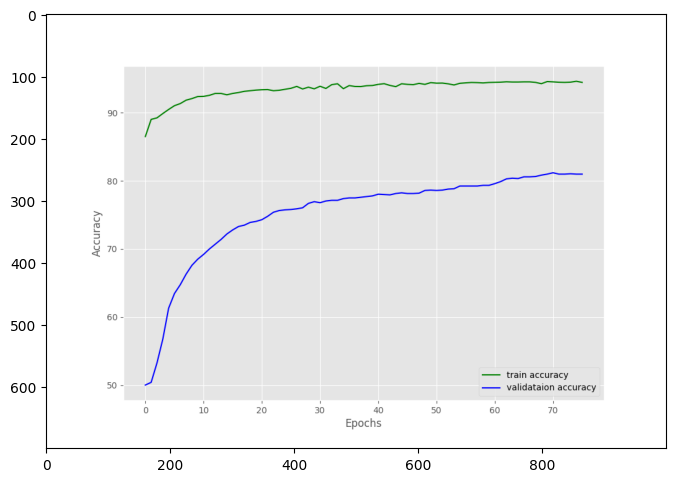

In [ ]:
#Plot Accuracy
image = plt.imread('/content/es_accuracy.png')
plt.figure(figsize = (8,6))
plt.imshow(image)
plt.show()

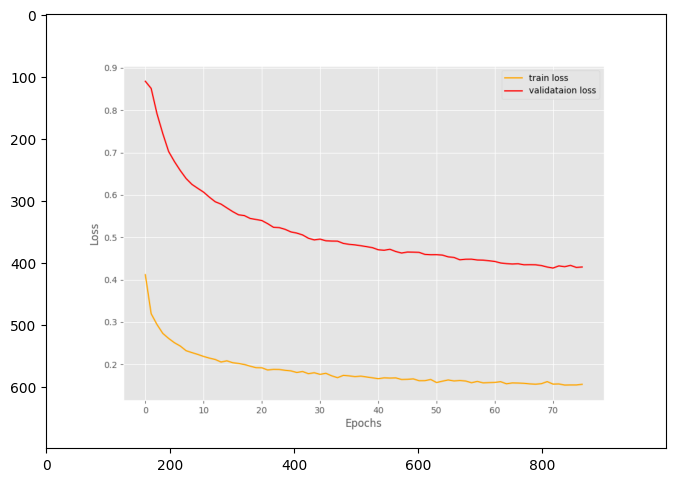

In [ ]:
#Plot Loss
image = plt.imread('/content/es_loss.png')
plt.figure(figsize = (8,6))
plt.imshow(image)
plt.show()

In [ ]:
#Initiate VGG model
def vgg16(pretrained=True, requires_grad=False):
    model = models.vgg16(progress=True, pretrained=pretrained)
    # Either freeze or train the hidden layer parameters
    if not requires_grad:
        for param in model.parameters():
            param.requires_grad = False
    elif requires_grad:
        for param in model.parameters():
            param.requires_grad = True
    # Make the classification layer learnable
    model.classifier[6] = nn.Linear(4096, 2)
    return model
VGG_model = vgg16(pretrained = True, requires_grad = False)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#Load state dictionary of the best model and input onto initiated model
VGG_model.load_state_dict(torch.load('es_model.pth', map_location=device ))
VGG_model = VGG_model.to(device)

In [ ]:
#Get predictions
images, labels, probs, y_test = get_predictions(VGG_model, test_iter, device)

In [ ]:
probs.shape

torch.Size([2000, 2])

In [ ]:
y_test.shape

torch.Size([2000, 2])

# ROC-AUC plots for VGG16

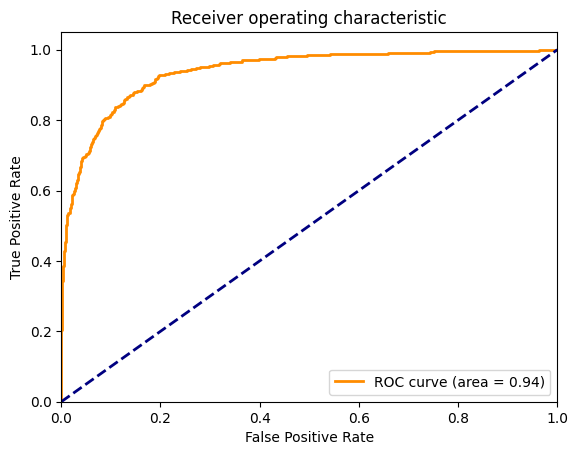

<ipython-input-129-1437ae663dce>:45: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


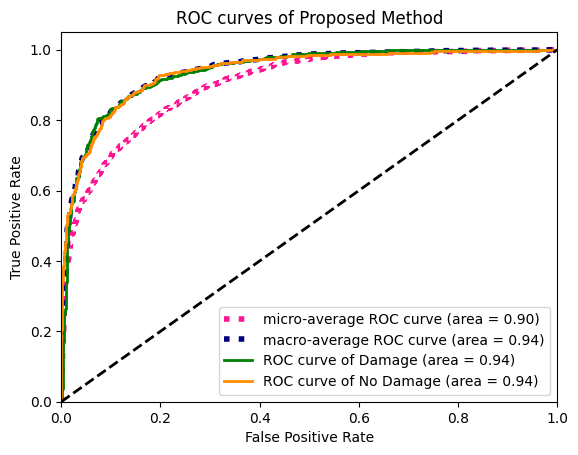

<Figure size 640x480 with 0 Axes>

In [ ]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of Damage (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='darkorange', lw=lw,
         label='ROC curve of No Damage (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()
plt.savefig('VGG16ROCAUC.png');

# Confusion Matrices

[[963  37]
 [346 654]]
[0 1]
[1000 1000]
[[1000. 1000.]
 [1000. 1000.]]


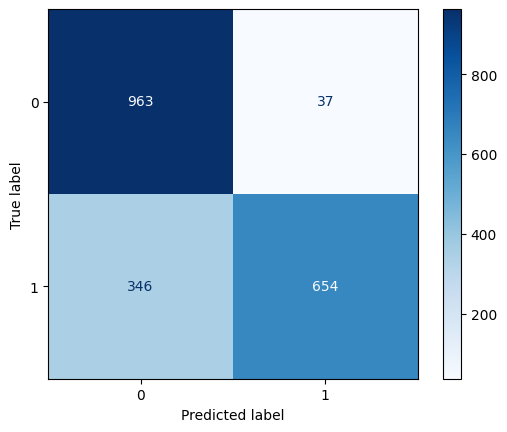

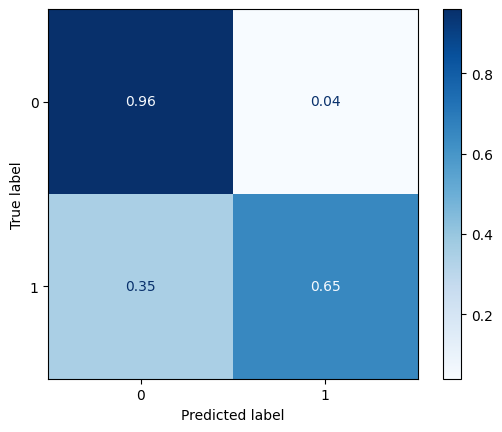

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)

C = cm
divisor = np.zeros((2,2))
divisor[0][:] = 1000
divisor[1][:] = 1000
cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')

# ResNet

In [ ]:
#@title ResNet model
class ResNet(nn.Module):
    def __init__(self, config, output_dim):
        super().__init__()

        block, n_blocks, channels = config
        self.in_channels = channels[0]

        assert len(n_blocks) == len(channels) == 4

        self.conv1 = nn.Conv2d(3, self.in_channels, kernel_size = 7, stride = 2, padding = 3, bias = False)
        self.bn1 = nn.BatchNorm2d(self.in_channels)
        self.relu = nn.ReLU(inplace = True)
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)

        self.layer1 = self.get_resnet_layer(block, n_blocks[0], channels[0])
        self.layer2 = self.get_resnet_layer(block, n_blocks[1], channels[1], stride = 2)
        self.layer3 = self.get_resnet_layer(block, n_blocks[2], channels[2], stride = 2)
        self.layer4 = self.get_resnet_layer(block, n_blocks[3], channels[3], stride = 2)

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(self.in_channels, output_dim)

    def get_resnet_layer(self, block, n_blocks, channels, stride = 1):

        layers = []

        if self.in_channels != block.expansion * channels:
            downsample = True
        else:
            downsample = False

        layers.append(block(self.in_channels, channels, stride, downsample))

        for i in range(1, n_blocks):
            layers.append(block(block.expansion * channels, channels))

        self.in_channels = block.expansion * channels

        return nn.Sequential(*layers)

    def forward(self, x):

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.fc(h)

        return x, h

class BasicBlock(nn.Module):

    expansion = 1

    def __init__(self, in_channels, out_channels, stride = 1, downsample = False):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3,
                               stride = stride, padding = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3,
                               stride = 1, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.relu = nn.ReLU(inplace = True)

        if downsample:
            conv = nn.Conv2d(in_channels, out_channels, kernel_size = 1,
                             stride = stride, bias = False)
            bn = nn.BatchNorm2d(out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None

        self.downsample = downsample

    def forward(self, x):

        i = x

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)

        if self.downsample is not None:
            i = self.downsample(i)

        x += i
        x = self.relu(x)

        return x

ResNetConfig = namedtuple('ResNetConfig', ['block', 'n_blocks', 'channels'])
resnet18_config = ResNetConfig(block = BasicBlock,
                               n_blocks = [2,2,2,2],
                               channels = [64, 128, 256, 512])

resnet34_config = ResNetConfig(block = BasicBlock,
                               n_blocks = [3,4,6,3],
                               channels = [64, 128, 256, 512])

class Bottleneck(nn.Module):

    expansion = 4

    def __init__(self, in_channels, out_channels, stride = 1, downsample = False):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 1,
                               stride = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3,
                               stride = stride, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.conv3 = nn.Conv2d(out_channels, self.expansion * out_channels, kernel_size = 1,
                               stride = 1, bias = False)
        self.bn3 = nn.BatchNorm2d(self.expansion * out_channels)

        self.relu = nn.ReLU(inplace = True)

        if downsample:
            conv = nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size = 1,
                             stride = stride, bias = False)
            bn = nn.BatchNorm2d(self.expansion * out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None

        self.downsample = downsample

    def forward(self, x):

        i = x

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)

        x = self.conv3(x)
        x = self.bn3(x)

        if self.downsample is not None:
            i = self.downsample(i)

        x += i
        x = self.relu(x)

        return x

resnet50_config = ResNetConfig(block = Bottleneck,
                               n_blocks = [3, 4, 6, 3],
                               channels = [64, 128, 256, 512])

resnet101_config = ResNetConfig(block = Bottleneck,
                                n_blocks = [3, 4, 23, 3],
                                channels = [64, 128, 256, 512])

resnet152_config = ResNetConfig(block = Bottleneck,
                                n_blocks = [3, 8, 36, 3],
                                channels = [64, 128, 256, 512])

In [ ]:
pretrained_resmodel = models.resnet50(pretrained = True)
IN_FEATURES = pretrained_resmodel.fc.in_features
OUTPUT_DIM = len(train_ds.classes)

fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)
pretrained_resmodel.fc = fc
resmodel = ResNet(resnet50_config, OUTPUT_DIM)
resmodel.load_state_dict(pretrained_resmodel.state_dict())

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 161MB/s]


<All keys matched successfully>

In [ ]:
#@title Top K Accuracy
def calculate_topk_accuracy(y_pred, y, k = 2):
    with torch.no_grad():
        batch_size = y.shape[0]
        _, top_pred = y_pred.topk(k, 1)
        top_pred = top_pred.t()
        correct = top_pred.eq(y.view(1, -1).expand_as(top_pred))
        correct_1 = correct[:1].reshape(-1).float().sum(0, keepdim = True)
        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim = True)
        acc_1 = correct_1 / batch_size
        acc_k = correct_k / batch_size
    return acc_1, acc_k

In [ ]:
#@title ResNet Train
def res_train(model, iterator, optimizer, criterion, scheduler, device):

    epoch_loss = 0
    epoch_acc_1 = 0
    epoch_acc_5 = 0

    model.train()

    for (x, y) in iterator:

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc_1, acc_5 = calculate_topk_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        scheduler.step()

        epoch_loss += loss.item()
        epoch_acc_1 += acc_1.item()
        epoch_acc_5 += acc_5.item()

    epoch_loss /= len(iterator)
    epoch_acc_1 /= len(iterator)
    epoch_acc_5 /= len(iterator)

    return epoch_loss, epoch_acc_1, epoch_acc_5

In [ ]:
#@title ResNet Evaluate
def res_evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc_1 = 0
    epoch_acc_5 = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc_1, acc_5 = calculate_topk_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc_1 += acc_1.item()
            epoch_acc_5 += acc_5.item()

    epoch_loss /= len(iterator)
    epoch_acc_1 /= len(iterator)
    epoch_acc_5 /= len(iterator)

    return epoch_loss, epoch_acc_1, epoch_acc_5

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()

resmodel = resmodel.to(device)
criterion = criterion.to(device)

EPOCHS = 5
STEPS_PER_EPOCH = len(train_iter)
TOTAL_STEPS = EPOCHS * STEPS_PER_EPOCH


Learning_rates = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
Opts = [optim.RMSprop, optim.Adam, optim.SGD]

res_train_accs_1   = []
res_valid_accs_1   = []
res_train_losses = []
res_valid_losses  = []
res_train_accs_5   = []
res_valid_accs_5   = []
res_epochs = []
res_lrs = []
res_opt = []

best_valid_loss = float('inf')
best_RES_model = None

for epoch in trange(EPOCHS, desc="Epochs"):
    for lear in Learning_rates:
      for optim in Opts:


        start_time = time.monotonic()

        params = [
          {'params': resmodel.conv1.parameters(), 'lr': lear / 10},
          {'params': resmodel.bn1.parameters(), 'lr': lear / 10},
          {'params': resmodel.layer1.parameters(), 'lr': lear / 8},
          {'params': resmodel.layer2.parameters(), 'lr': lear / 6},
          {'params': resmodel.layer3.parameters(), 'lr': lear / 4},
          {'params': resmodel.layer4.parameters(), 'lr': lear / 2},
          {'params': resmodel.fc.parameters()}
         ]

        optimizer = optim(params, lr = lear)

        MAX_LRS = [p['lr'] for p in optimizer.param_groups]

        scheduler = lr_scheduler.OneCycleLR(optimizer,
                                    max_lr = MAX_LRS,
                                    total_steps = TOTAL_STEPS)

        train_loss, train_acc_1, train_acc_5 = res_train(resmodel, train_iter, optimizer, criterion, scheduler, device)
        valid_loss, valid_acc_1, valid_acc_5 = res_evaluate(resmodel, valid_iter, criterion, device)

        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(resmodel.state_dict(), 'best-model.pt')
            best_resmodel = resmodel.state_dict()

        end_time = time.monotonic()

        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

        res_train_accs_1.append(train_acc_1)
        res_valid_accs_1.append(valid_acc_1)
        res_train_accs_5.append(train_acc_5)
        res_valid_accs_5.append(valid_acc_5)
        res_train_losses.append(train_loss)
        res_valid_losses.append(valid_loss)
        res_lrs.append(lear)
        res_opt.append(optim)
        res_epochs.append(epoch)


        print(f'Optimiser: {optim} | Learning Rate: {lear} | Epoch: {epoch}')
        print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
        print(f'\tTrain Loss: {train_loss:.3f} | Train Acc @1: {train_acc_1*100:6.2f}% | ' \
          f'Train Acc @5: {train_acc_5*100:6.2f}%')
        print(f'\tValid Loss: {valid_loss:.3f} | Valid Acc @1: {valid_acc_1*100:6.2f}% | ' \
          f'Valid Acc @5: {valid_acc_5*100:6.2f}%')

#Saving the best VGG model configuration

torch.save(best_resmodel, 'best_resmodel.pt')

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 1e-07 | Epoch: 0
Epoch: 01 | Epoch Time: 0m 37s
	Train Loss: 0.688 | Train Acc @1:  56.54% | Train Acc @5: 100.00%
	Valid Loss: 0.931 | Valid Acc @1:  15.31% | Valid Acc @5: 100.00%
Optimiser: <class 'torch.optim.adam.Adam'> | Learning Rate: 1e-07 | Epoch: 0
Epoch: 01 | Epoch Time: 0m 37s
	Train Loss: 0.687 | Train Acc @1:  56.92% | Train Acc @5: 100.00%
	Valid Loss: 0.908 | Valid Acc @1:  14.62% | Valid Acc @5: 100.00%
Optimiser: <class 'torch.optim.sgd.SGD'> | Learning Rate: 1e-07 | Epoch: 0
Epoch: 01 | Epoch Time: 0m 36s
	Train Loss: 0.682 | Train Acc @1:  57.34% | Train Acc @5: 100.00%
	Valid Loss: 0.889 | Valid Acc @1:  18.16% | Valid Acc @5: 100.00%
Optimiser: <class 'torch.optim.rmsprop.RMSprop'> | Learning Rate: 1e-06 | Epoch: 0
Epoch: 01 | Epoch Time: 0m 35s
	Train Loss: 0.648 | Train Acc @1:  62.77% | Train Acc @5: 100.00%
	Valid Loss: 0.894 | Valid Acc @1:  17.09% | Valid Acc @5: 100.00%
Optimiser: <class 'tor

In [ ]:
res_accs_losses = pd.DataFrame(

    {'Optimiser':res_opt,
     'Learning Rate': res_lrs,
     'Epochs': res_epochs,
     'train_accuracy_1': res_train_accs_1,
     'valid_accuracy_1': res_valid_accs_1,
     'train_accuracy_5': res_train_accs_5,
     'valid_accuracy_5': res_valid_accs_5,
     'train_loss': res_train_losses,
     'valid_loss': res_valid_losses}
)

The best combination of optimiser and learning rate for the ResNet50 model is shown to be the RMSprop optimiser with a learning rate of 0.0001.

In [ ]:
res_accs_losses.loc[res_accs_losses['valid_loss'].idxmin()]

Optimiser           <class 'torch.optim.adam.Adam'>
Learning Rate                                0.0001
Epochs                                            3
train_accuracy_1                           0.961338
valid_accuracy_1                           0.929827
train_accuracy_5                                1.0
valid_accuracy_5                                1.0
train_loss                                 0.109512
valid_loss                                 0.148439
Name: 55, dtype: object

In [ ]:
%%writefile models.py
import torch.nn as nn
import torchvision.models as models

def resnet50(pretrained=True, requires_grad=False):
    model = models.resnet50(progress=True, pretrained=pretrained)
    # either freeze or train the hidden layer parameters
    if requires_grad == False:
        for param in model.parameters():
            param.requires_grad = False
    elif requires_grad == True:
        for param in model.parameters():
            param.requires_grad = True
    # make the classification layer learnable
    model.fc = nn.Linear(2048, 2)
    return model

Overwriting models.py


In [ ]:
%%writefile restrain.py
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import time
import models
import os
import argparse

from dataset import train_dataloader, val_dataloader
from dataset import train_dataset, val_dataset
from utils import EarlyStopping, LRScheduler
from tqdm import tqdm

# current directory

current_dir = os.getcwd()

# create file paths to save outputs

matplotlib.style.use('ggplot')

# construct the argument parser
parser = argparse.ArgumentParser()
parser.add_argument('--lr-scheduler', dest='lr_scheduler', action='store_true')
parser.add_argument('--early-stopping', dest='early_stopping', action='store_true')
args = vars(parser.parse_args())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")
# instantiate the model
model = models.resnet50(pretrained=True, requires_grad=False).to(device)
# total parameters and trainable parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")

# learning parameters
lr = 0.0001
epochs = 100
# optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# loss function
criterion = nn.CrossEntropyLoss()

# strings to save the loss plot, accuracy plot, and model with different ...
# ... names according to the training type
# if not using `--lr-scheduler` or `--early-stopping`, then use simple names
loss_plot_name = 'loss'
acc_plot_name = 'accuracy'
model_name = 'model'

# either initialize early stopping or learning rate scheduler
if args['lr_scheduler']:
    print('INFO: Initializing learning rate scheduler')
    lr_scheduler = LRScheduler(optimizer)
    # change the accuracy, loss plot names and model name
    loss_plot_name = 'lrs_loss'
    acc_plot_name = 'lrs_accuracy'
    model_name = 'lrs_model'
if args['early_stopping']:
    print('INFO: Initializing early stopping')
    early_stopping = EarlyStopping()
    # change the accuracy, loss plot names and model name
    loss_plot_name = 'es_loss'
    acc_plot_name = 'es_accuracy'
    model_name = 'es_model'

# training function
def fit(model, train_dataloader, train_dataset, optimizer, criterion):
    print('Training')
    model.train()
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    total = 0
    prog_bar = tqdm(enumerate(train_dataloader), total=int(len(train_dataset)/train_dataloader.batch_size))
    for i, data in prog_bar:
        counter += 1
        data, target = data[0].to(device), data[1].to(device)
        total += target.size(0)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        train_running_loss += loss.item()
        _, preds = torch.max(outputs.data, 1)
        train_running_correct += (preds == target).sum().item()
        loss.backward()
        optimizer.step()

    train_loss = train_running_loss / counter
    train_accuracy = 100. * train_running_correct / total
    return train_loss, train_accuracy

# validation function
def validate(model, test_dataloader, val_dataset, criterion):
    print('Validating')
    model.eval()
    val_running_loss = 0.0
    val_running_correct = 0
    counter = 0
    total = 0
    prog_bar = tqdm(enumerate(test_dataloader), total=int(len(val_dataset)/test_dataloader.batch_size))
    with torch.no_grad():
        for i, data in prog_bar:
            counter += 1
            data, target = data[0].to(device), data[1].to(device)
            total += target.size(0)
            outputs = model(data)
            loss = criterion(outputs, target)

            val_running_loss += loss.item()
            _, preds = torch.max(outputs.data, 1)
            val_running_correct += (preds == target).sum().item()

        val_loss = val_running_loss / counter
        val_accuracy = 100. * val_running_correct / total
        return val_loss, val_accuracy

# lists to store per-epoch loss and accuracy values
train_loss, train_accuracy = [], []
val_loss, val_accuracy = [], []
start = time.time()
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_accuracy = fit(
        model, train_dataloader, train_dataset, optimizer, criterion
    )
    val_epoch_loss, val_epoch_accuracy = validate(
        model, val_dataloader, val_dataset, criterion
    )
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_loss.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
    if args['lr_scheduler']:
        lr_scheduler(val_epoch_loss)
    if args['early_stopping']:
        early_stopping(val_epoch_loss)
        if early_stopping.early_stop:
            break

    print(f"Train Loss: {train_epoch_loss:.4f}, Train Acc: {train_epoch_accuracy:.2f}")
    print(f'Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_accuracy:.2f}')

end = time.time()
print(f"Training time: {(end-start)/60:.3f} minutes")

print('Saving loss and accuracy plots...')
# accuracy plots
plt.figure(figsize=(10, 7))
plt.plot(train_accuracy, color='green', label='train accuracy')
plt.plot(val_accuracy, color='blue', label='validataion accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(f"{acc_plot_name}.png")
plt.show()

# loss plots
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f"{loss_plot_name}.png")
plt.show()

# serialize the model to disk
print('Saving model...')
torch.save(model.state_dict(), f"{model_name}.pth")

print('TRAINING COMPLETE')

Overwriting restrain.py


In [ ]:
!python restrain.py --lr-scheduler --early-stopping

Computation device: cuda

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
23,512,130 total parameters.
4,098 training parameters.
INFO: Initializing learning rate scheduler
INFO: Initializing early stopping
Epoch 1 of 100
Training
282it [00:33,  8.44it/s]             
Validating
63it [00:06, 10.14it/s]
Train Loss: 0.2947, Train Acc: 88.97
Val Loss: 0.6758, Val Acc: 56.00
Epoch 2 of 100
Training
282it [00:31,  9.09it/s]   

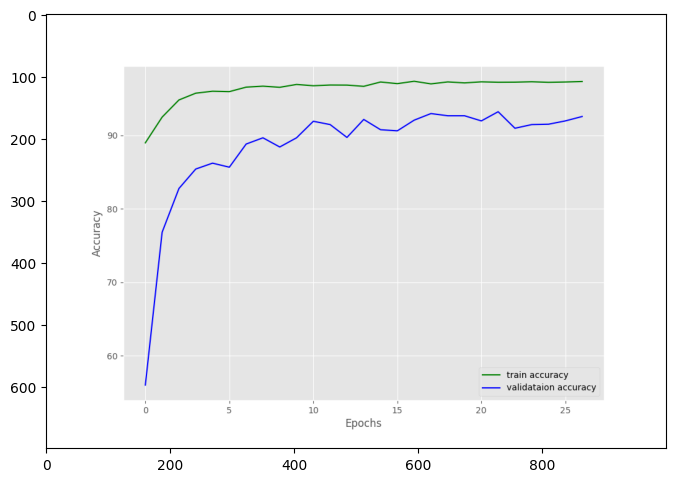

In [ ]:
image = plt.imread('/content/es_accuracy.png')
plt.figure(figsize = (8,6))
plt.imshow(image)
plt.show()

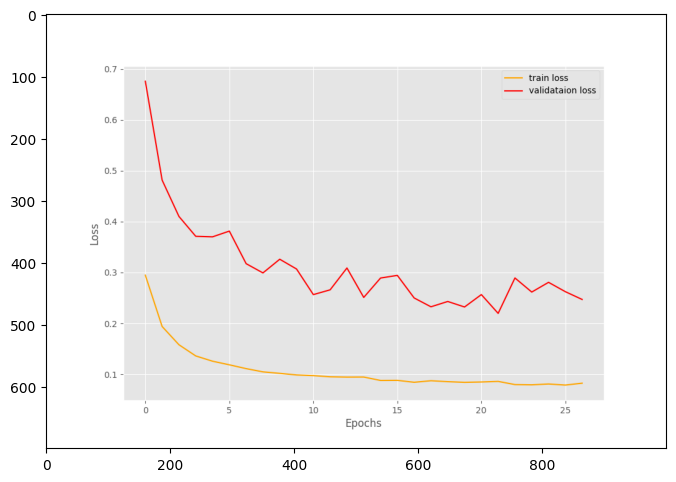

In [ ]:
image = plt.imread('/content/es_loss.png')
plt.figure(figsize = (8,6))
plt.imshow(image)
plt.show()

In [ ]:
!python restrain.py --lr-scheduler

Computation device: cuda

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
23,512,130 total parameters.
4,098 training parameters.
INFO: Initializing learning rate scheduler
Epoch 1 of 100
Training
282it [00:38,  7.30it/s]             
Validating
63it [00:07,  8.66it/s]            
Train Loss: 0.3125, Train Acc: 88.23
Val Loss: 0.6760, Val Acc: 54.15
Epoch 2 of 100
Training
282it [00:32,  8.76it/s]             
Validating


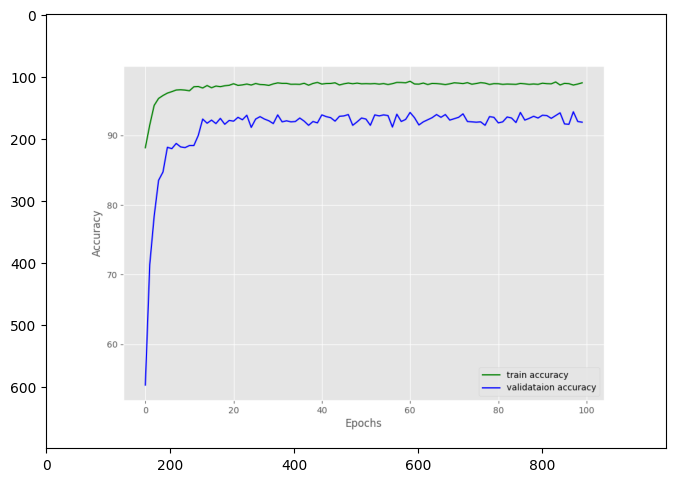

In [ ]:
image = plt.imread('/content/lrs_accuracy.png')
plt.figure(figsize = (8,6))
plt.imshow(image)
plt.show()

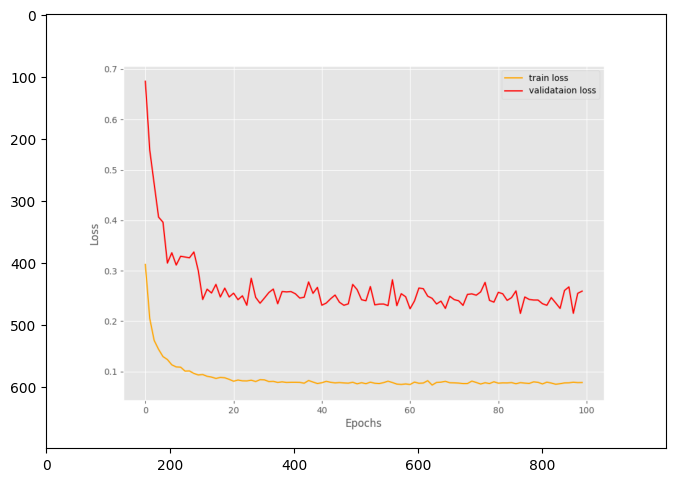

In [ ]:
image = plt.imread('/content/lrs_loss.png')
plt.figure(figsize = (8,6))
plt.imshow(image)
plt.show()

In [ ]:
def resnet50(pretrained=True, requires_grad=False):
    model = models.resnet50(progress=True, pretrained=pretrained)
    # either freeze or train the hidden layer parameters
    if requires_grad == False:
        for param in model.parameters():
            param.requires_grad = False
    elif requires_grad == True:
        for param in model.parameters():
            param.requires_grad = True
    # make the classification layer learnable
    model.fc = nn.Linear(2048, 2)
    return model

res_model = resnet50(pretrained = True, requires_grad = False)

In [ ]:
res_model.load_state_dict(torch.load('es_model.pth', map_location=device ))
res_model = res_model.to(device)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
images, labels, probs, y_test = get_predictions(res_model, test_iter, device)

# ROC-AUC plots

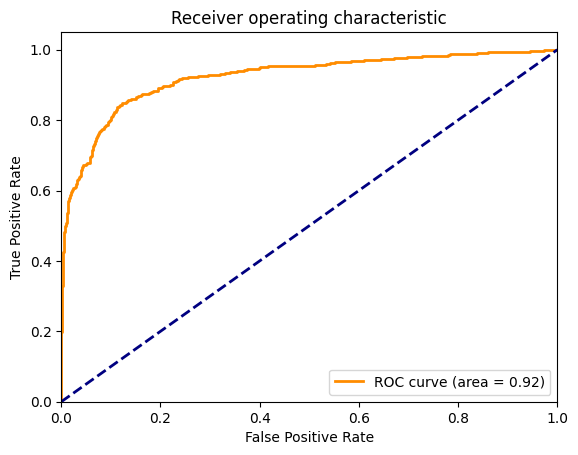

<ipython-input-66-1437ae663dce>:45: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


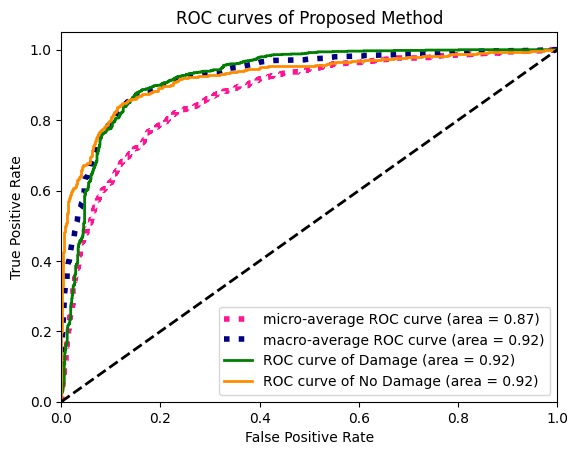

<Figure size 640x480 with 0 Axes>

In [ ]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of Damage (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='darkorange', lw=lw,
         label='ROC curve of No Damage (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()
plt.savefig('VGG16ROCAUC.png');

# Confusion Matrices

[[971  29]
 [388 612]]
[0 1]
[1000 1000]
[[1000. 1000.]
 [1000. 1000.]]


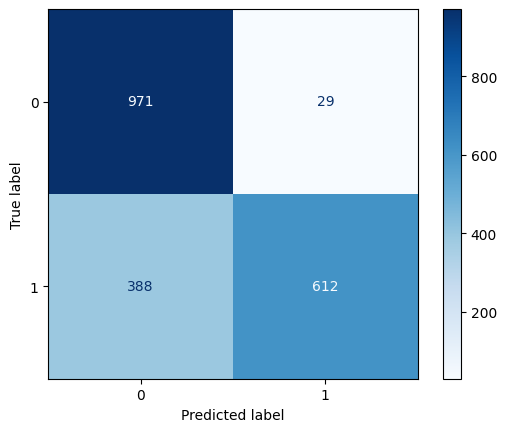

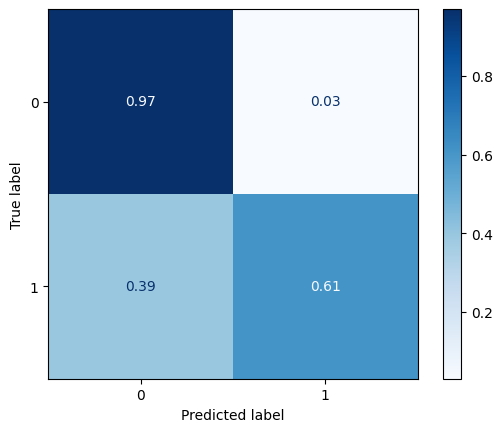

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)

C = cm
divisor = np.zeros((2,2))
divisor[0][:] = 1000
divisor[1][:] = 1000
cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')